# Comment utiliser la bibliothèques EIM

## import

### installation de la librairie ( à faire que si la librairie n'est pas déja installé)

In [ ]:
!git https://github.com/samsja/eim.git

In [ ]:
!pip install src/packages/dist/eim_samsja_faycal-0.0.1-py3-none-any.wh

### import basic library to use EIM packages and to manipule data

In [1]:
from eim import eim_vectorial_optim

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

## Creating the data to present the exemple

EIM is an dimensionality reduction algorithm that take has main parameters a cube of data

We need first to generate a data cube for the exemple, it is basicely done by applying the function f to a set of points

In [ ]:
def f(x,mu):
    return np.array([np.cos(mu*x),np.sin(x/mu),np.exp(x/mu)]).T
N=200
x_values = np.linspace(1,10,num=N)
Nmu=300
M = np.linspace(1,10,Nmu)

Z = np.zeros((M.shape[0],x_values.shape[0],3))

for i in range(M.shape[0]):
    Z[i] = np.array(f(x_values,M[i]))

In [4]:
Z.shape

(300, 200, 3)

The data set has to respect has to be an numpy array or a torch tensor with the following shape(M,N,D) where

* M is the number of entry , in the theorical point of view M is the dimension of the parameters spaces : $\mu$ dans $f(\cdot,\mu)$

* N is the number of point i.e the numbert of colone of the data cube

* D is the dimension of the arrival space of the function, when appliying it to a data cube such as a dataframe it is usualy 1, in can change when using eim on simulation datas

In [5]:
ev = eim_vectorial_optim(Z,from_numpy=True)

You can etiher way load the data directly from a numpy array or an torch tensor

In [6]:
Z_torch = torch.from_numpy(Z)
ev = eim_vectorial_optim(Z_torch)

The shape can also be (N,M) it will automaticely be reshaped to a (N,M,1) tensor

In [7]:
Z2 = np.zeros((4,5))
ev2 = eim_vectorial_optim(Z2,from_numpy=True)
ev2.Z.shape

torch.Size([4, 5, 1])

## How to train de algorithm

The main method to train the algo is : reach_precision()

0.3997865888713237 error in 0.001554727554321289 s :  12%|█▏        | 35/300 [00:00<00:00, 525.75it/s] 

 we have a 35-kolmogorov-width with a final error of 0.06469335928085229, dimensionality reduction : 0.8833333333333333  


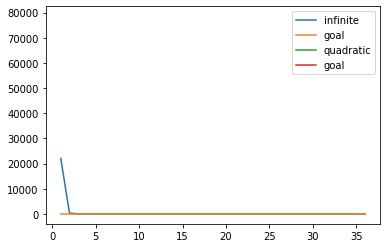

In [8]:
ev.reach_precision(epsilon=1e-1)

You can call this method with the a finite number of iteration 

In [10]:
ev.reach_precision(epsilon=1e-1,nb_iter=2,plot=False)

22026.465794806718 error in 0.002863645553588867 s :  50%|█████     | 1/2 [00:00<00:00, 320.30it/s]  

 we have a 1-kolmogorov-width with a final error of 314.3121149695935, dimensionality reduction : 0.9966666666666667  


if you want to continue the training without starting from zero, you can precise ```reset=False```

In [11]:
ev.reach_precision(epsilon=1e-1,nb_iter=2,plot=False,reset=False)

15.374218480568075 error in 0.002766847610473633 s :  50%|█████     | 1/2 [00:00<00:00, 372.89it/s]  

 we have a 1-kolmogorov-width with a final error of 1.9050048031262123, dimensionality reduction : 0.9966666666666667  


Of course all the code is fully documented so you can load the documentation from each method

In [12]:
ev.reach_precision?

## How to use the reduced model compute by EIM

Once the models is train you can generate new reduced data for any data, i.e, projeting thoses new data is the reduced function space of the model

In [13]:
alphas = ev.compute_alpha(ev.m,ev.Z)

note that there is a big interest to use an ```m``` paramaters less than the ```self.m```. In fact we could want to calculate the desire reduced for a given precision. Then by looking at the error graph we can see that there existe some dimension gaps and that it could be better to take reduce a little bit the precision to win in data reduction without re compute all the models, juste take an little ```m```

Once you got your alphas coefficient you can compute the reduced data  in the m-base generated by eim

In [15]:
ev.project_with_alpha(alphas).shape

torch.Size([300, 200, 3])

## Save and load the models

In [16]:
ev.save_model("data/model/test.model")

In [17]:
ev_load = eim_vectorial_optim(None,load=True)

In [18]:
ev_load.load_model("data/model/test.model")

In [19]:
(ev_load.Q_tab == ev.Q_tab).all() ,(ev_load.x_magics == ev.x_magics).all(),(ev_load.j_magics == ev.j_magics).all(),(ev_load.x_magics == ev.x_magics).all(),(ev_load.mu_magics == ev.mu_magics).all()

(tensor(True), tensor(True), tensor(True), tensor(True), tensor(True))